In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://academy.dqlab.id/dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print('Number of Training Examples = {0}'.format([df_train]))
print('Number of Test Examples = {0}\n'.format([df_test]))
print('Training X Shape = {0}'.format([df_train.shape]))
print('Training y Shape = {0}\n'.format([df_train['Survived'].shape[0]]))
print('Test X Shape = {0}'.format([df_test.shape]))
print('Test y Shape = {0}\n'.format([df_test.shape[0]]))
print([df_train.shape[1]])
print([df_test.shape[1]])

Number of Training Examples = [     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                    

In [5]:
print(df_train.info(memory_usage=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)None


In [6]:
df_train_corr = [df_train.corr().abs()]
df_train_corr

[             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
 PassengerId     1.000000  0.005007  0.035144  0.036847  0.057527  0.001652   
 Survived        0.005007  1.000000  0.338481  0.077221  0.035322  0.081629   
 Pclass          0.035144  0.338481  1.000000  0.369226  0.083081  0.018443   
 Age             0.036847  0.077221  0.369226  1.000000  0.308247  0.189119   
 SibSp           0.057527  0.035322  0.083081  0.308247  1.000000  0.414838   
 Parch           0.001652  0.081629  0.018443  0.189119  0.414838  1.000000   
 Fare            0.012658  0.257307  0.549500  0.096067  0.159651  0.216225   
 
                  Fare  
 PassengerId  0.012658  
 Survived     0.257307  
 Pclass       0.549500  
 Age          0.096067  
 SibSp        0.159651  
 Parch        0.216225  
 Fare         1.000000  ]

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.corr().abs() #abs() adalah absolute

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651
Parch,0.001652,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
# Mengenali missing data dari kolom
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 
dfs = [df_train, df_test]

def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




In [10]:
#Mencari nilai untuk missing value

age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [11]:
age_by_pclass_sex

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [12]:
df_all['Age'].value_counts()


25.00    178
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
74.00      1
24.50      1
80.00      1
23.50      1
0.67       1
Name: Age, Length: 99, dtype: int64

In [13]:
# Mengisi nilai kosong
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df_all['Embarked']= df_all['Embarked'].fillna('S')
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [15]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
### Filling the missing value in Fare with the median Fare of 3rd class alone passenger
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0] 
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

In [17]:
med_fare

7.8542

In [18]:
df_all.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,25.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [19]:
plt.xlabel?

In [20]:
plt.tick_params?

In [21]:
sns.countplot?

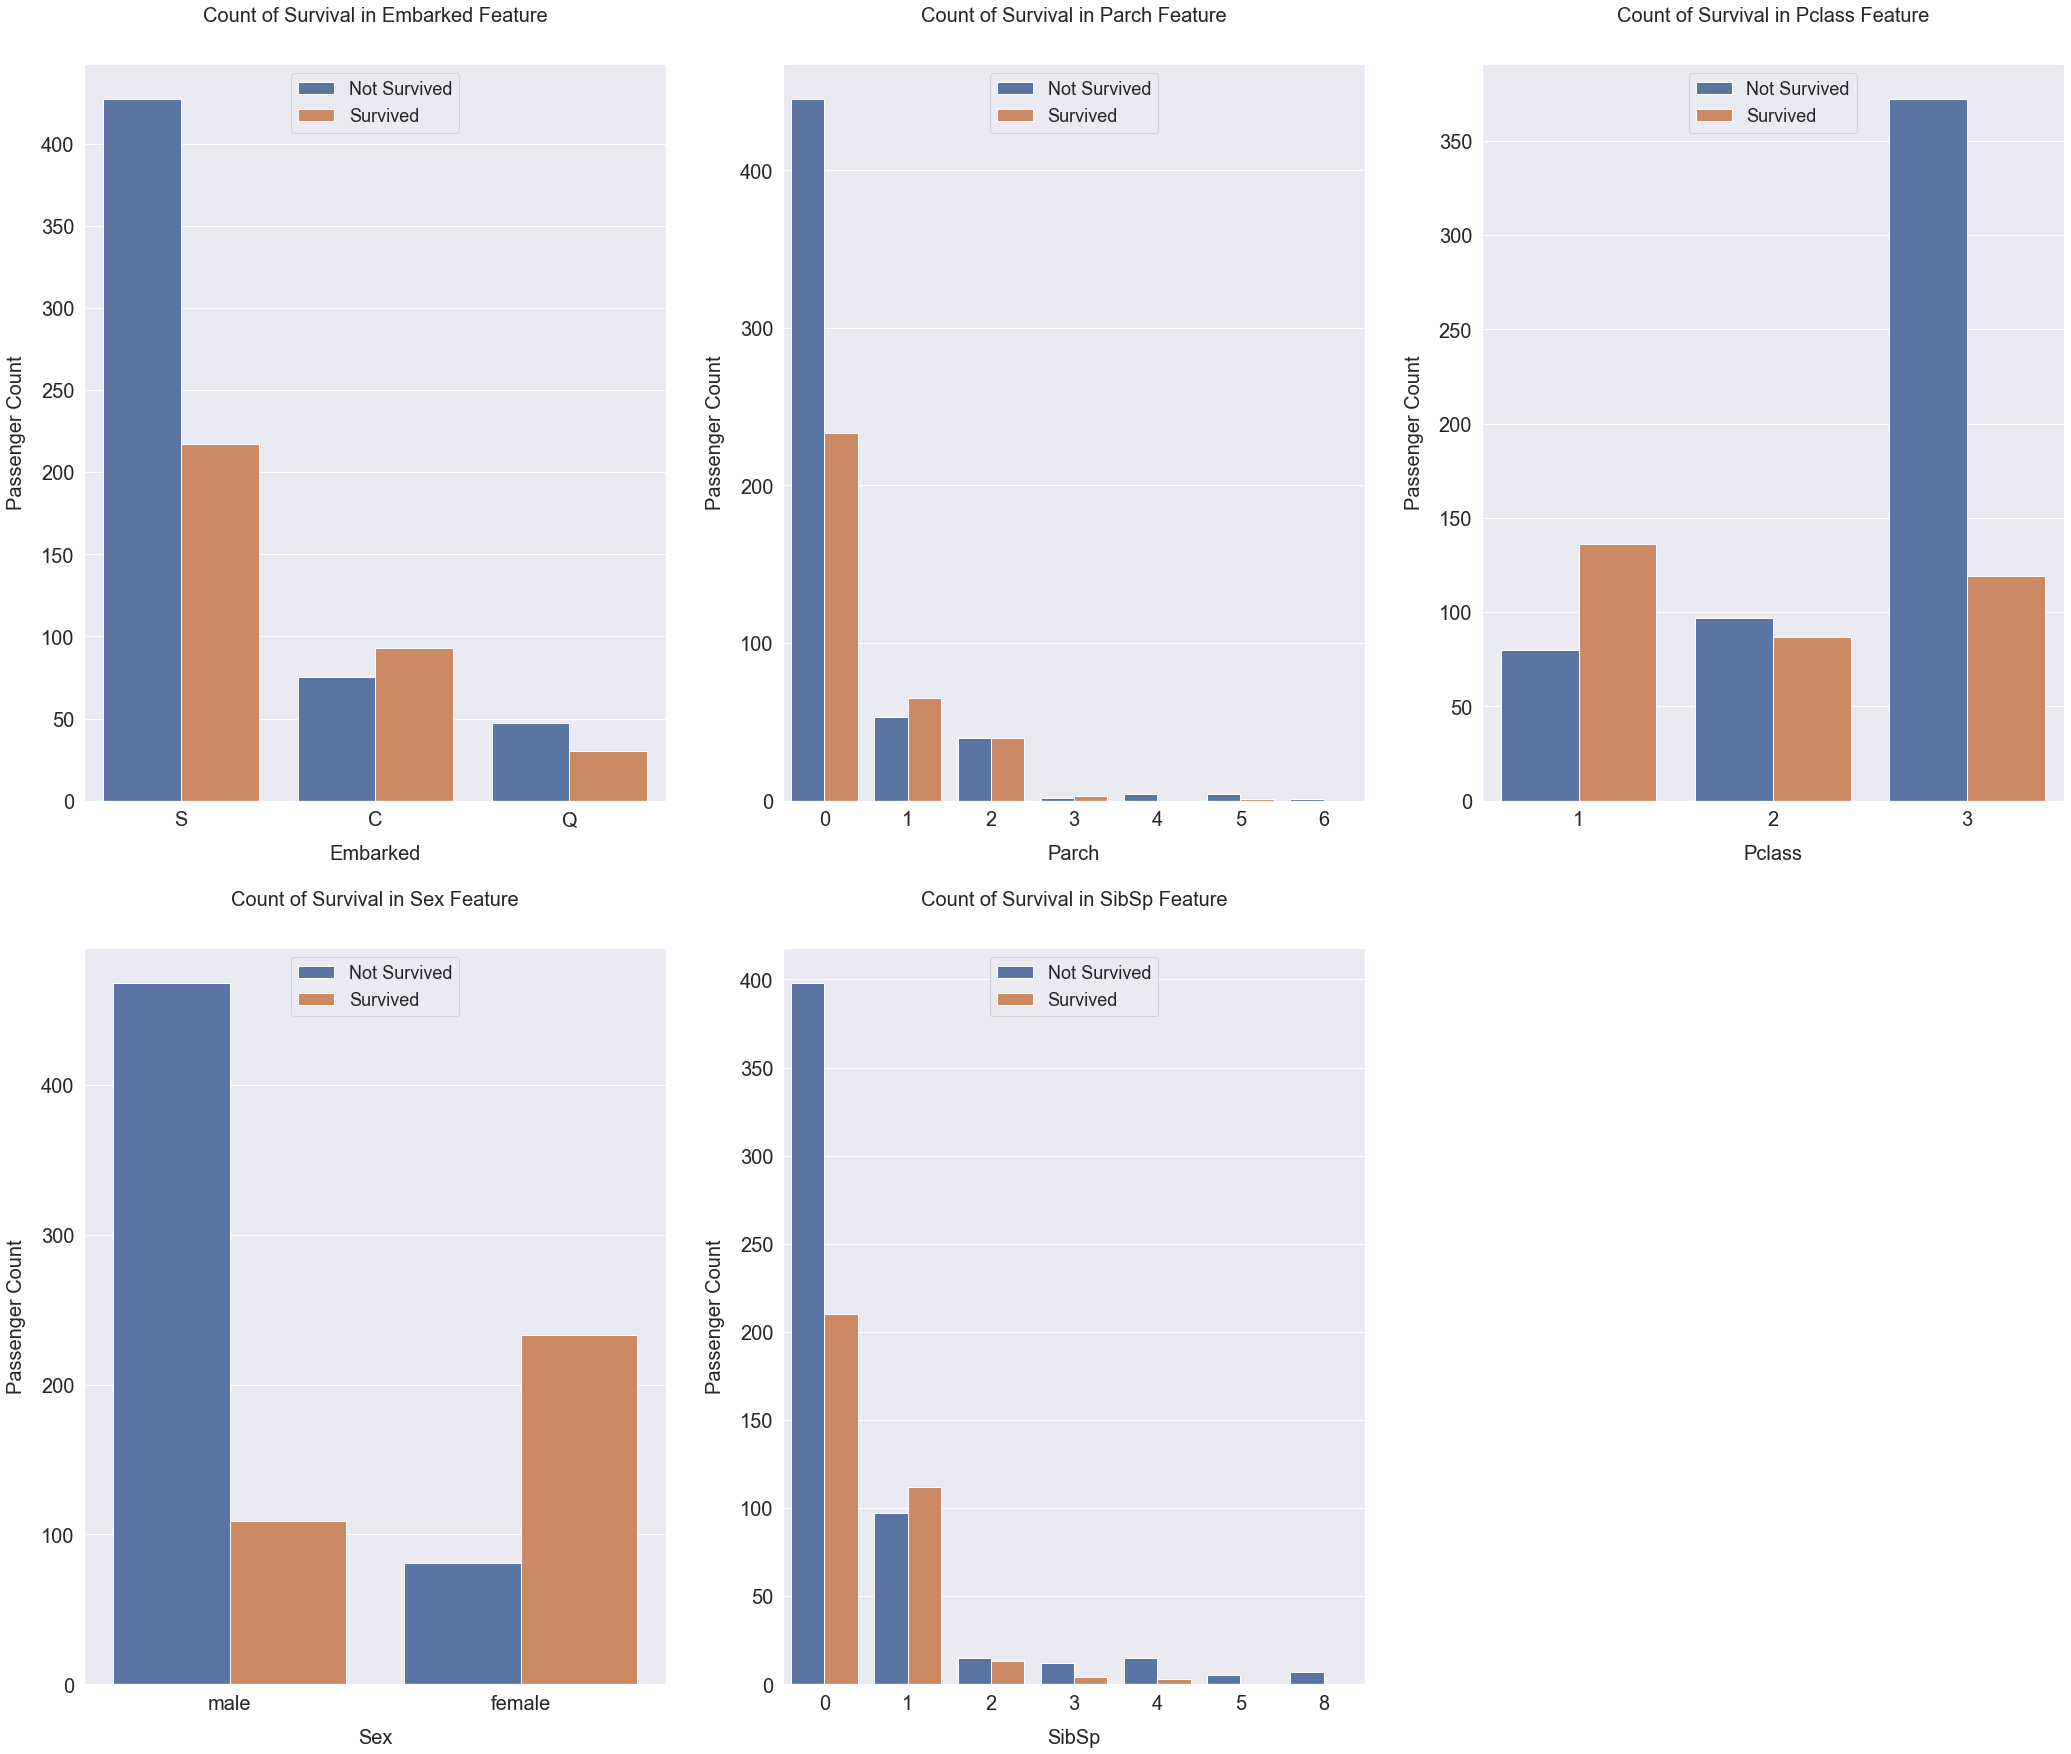

In [22]:
# Exploring data

import matplotlib.pyplot as plt
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features,1):
    plt.subplot(2,3,i)
    sns.countplot(x=feature, hue='Survived', data=df_train)

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size':18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
plt.show()


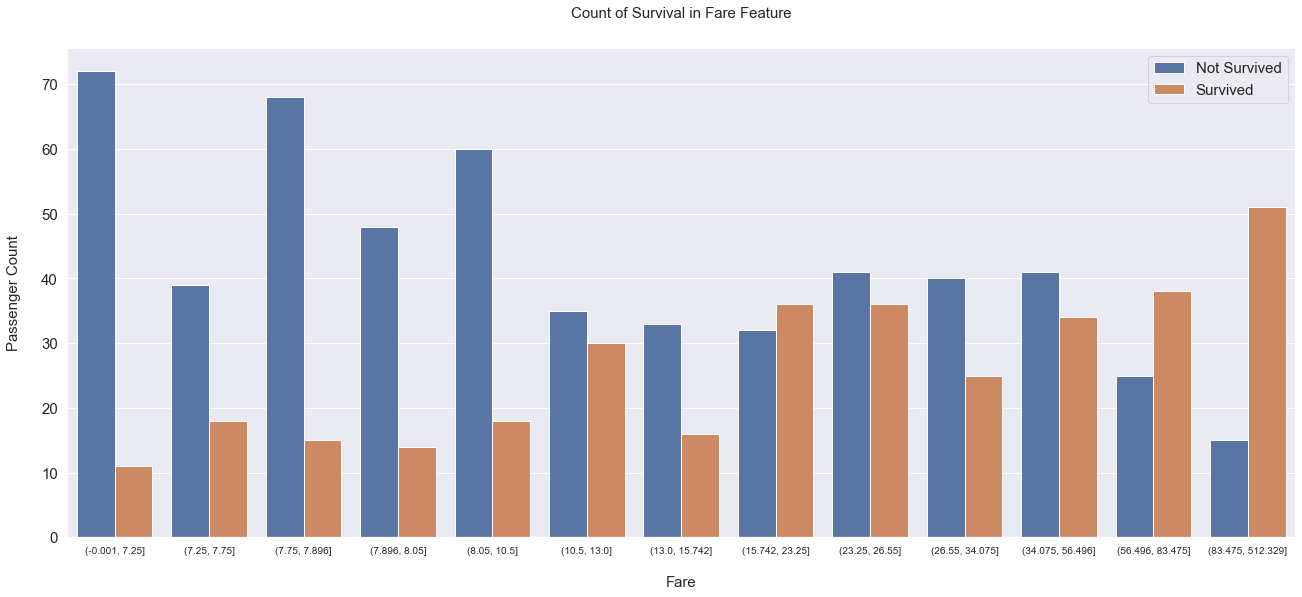

In [23]:
# Exploring data 2
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'. format('Fare'), size=15, y=1.05)
plt.show()

## Feature Engineering - Part 1

Feature Engineering adalah tentang membuat fitur baru dari fitur yang sudah ada.

Dari sini kita akan membuat beberapa fitur baru yang bertujuan menaikkan akurasi dari model machine learning kita.

Fitur pertama yang kita buat adalah Family_Size, sesuai namanya ini adalah gabungan dari Parent, Children, Sibling, dan Spouse. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga.

In [24]:
import matplotlib.pyplot as plt
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


In [25]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 
              5: 'Medium', 6: 'Medium', 7: 'Large', 
              8: 'Large', 11: 'Large'}

df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone


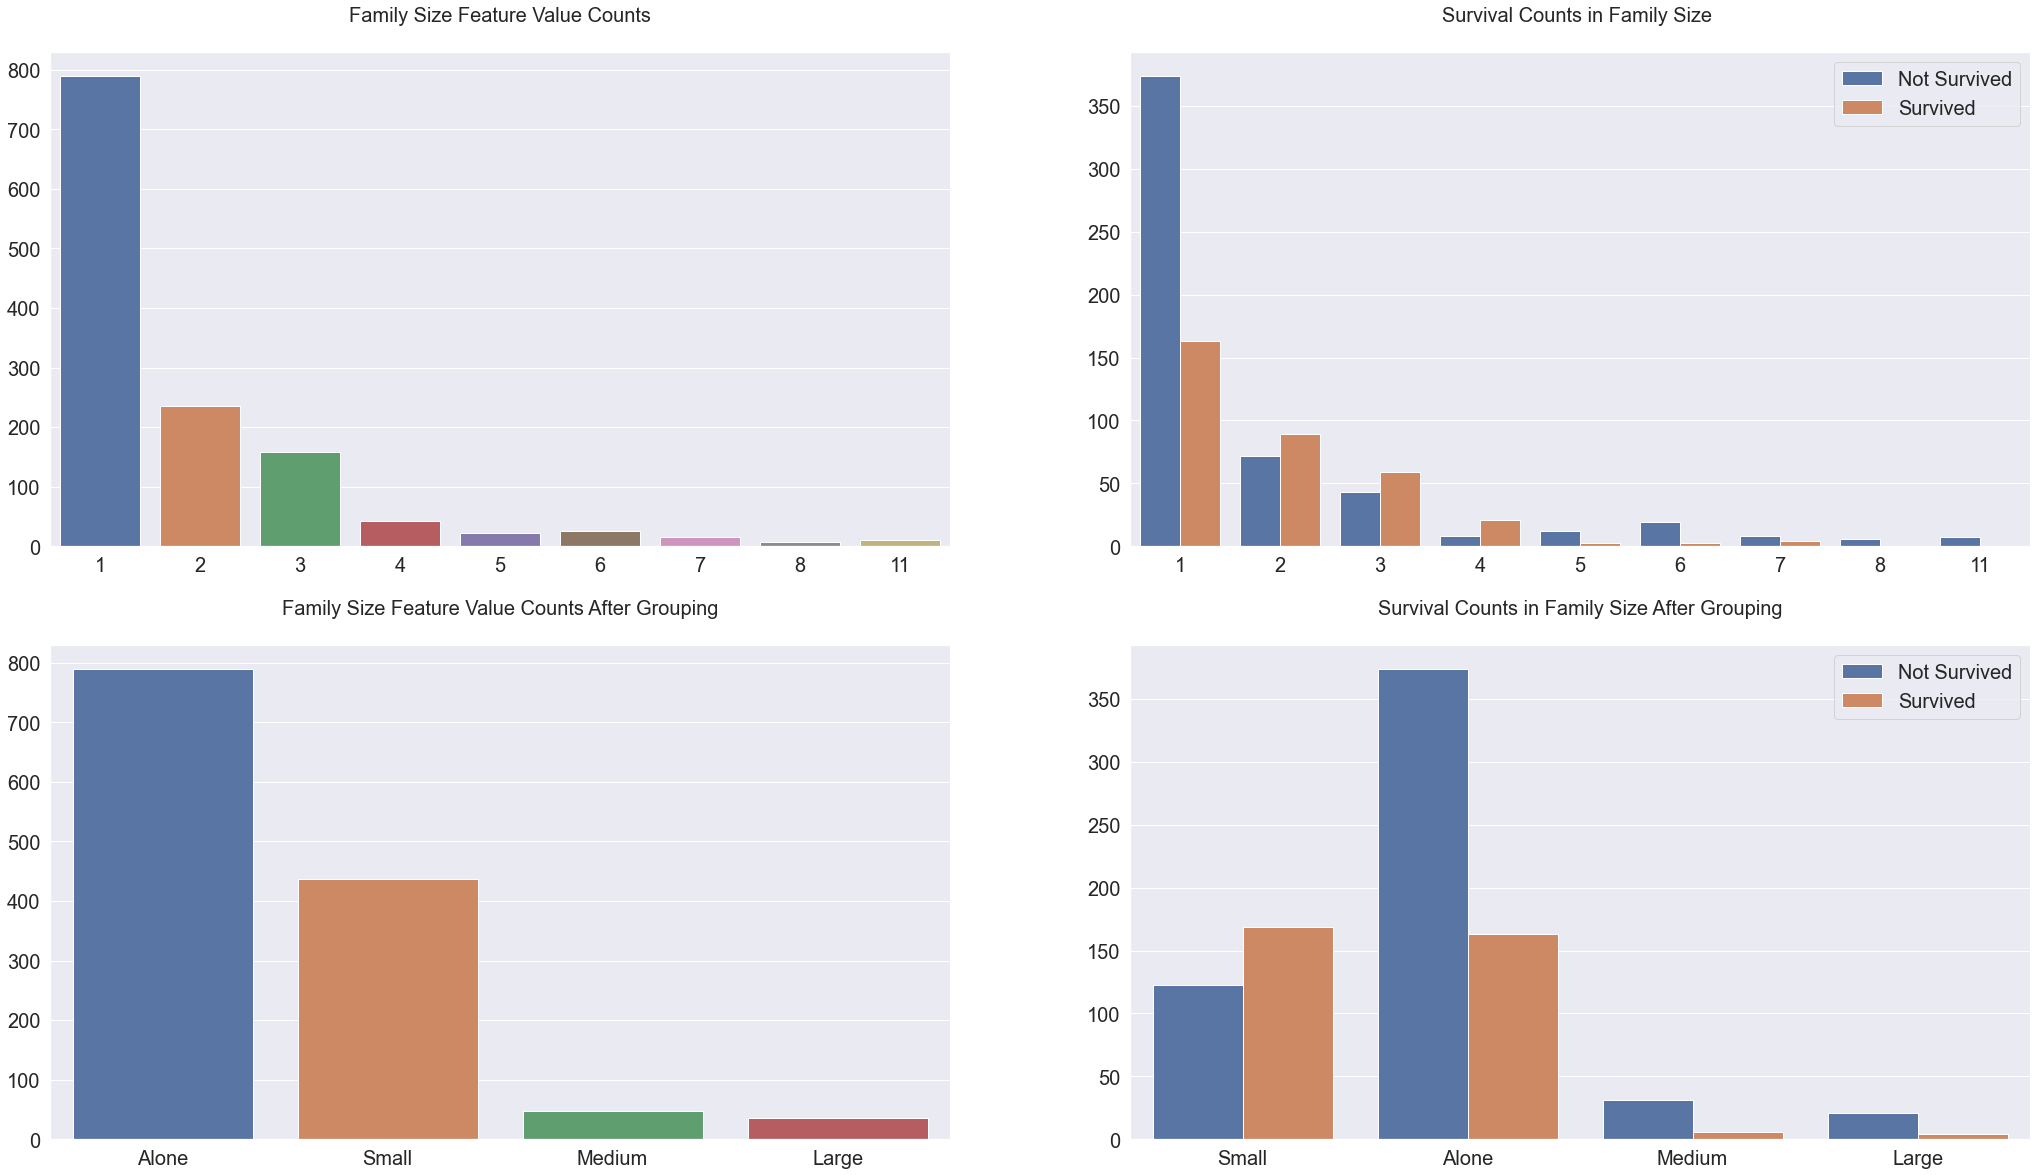

In [26]:
x1=df_all['Family_Size'].value_counts().index
y1=df_all['Family_Size'].value_counts().values

x2=df_all['Family_Size_Grouped'].value_counts().index
y2=df_all['Family_Size_Grouped'].value_counts().values

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x1, y1, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

sns.barplot(x2, y2, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

In [27]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone


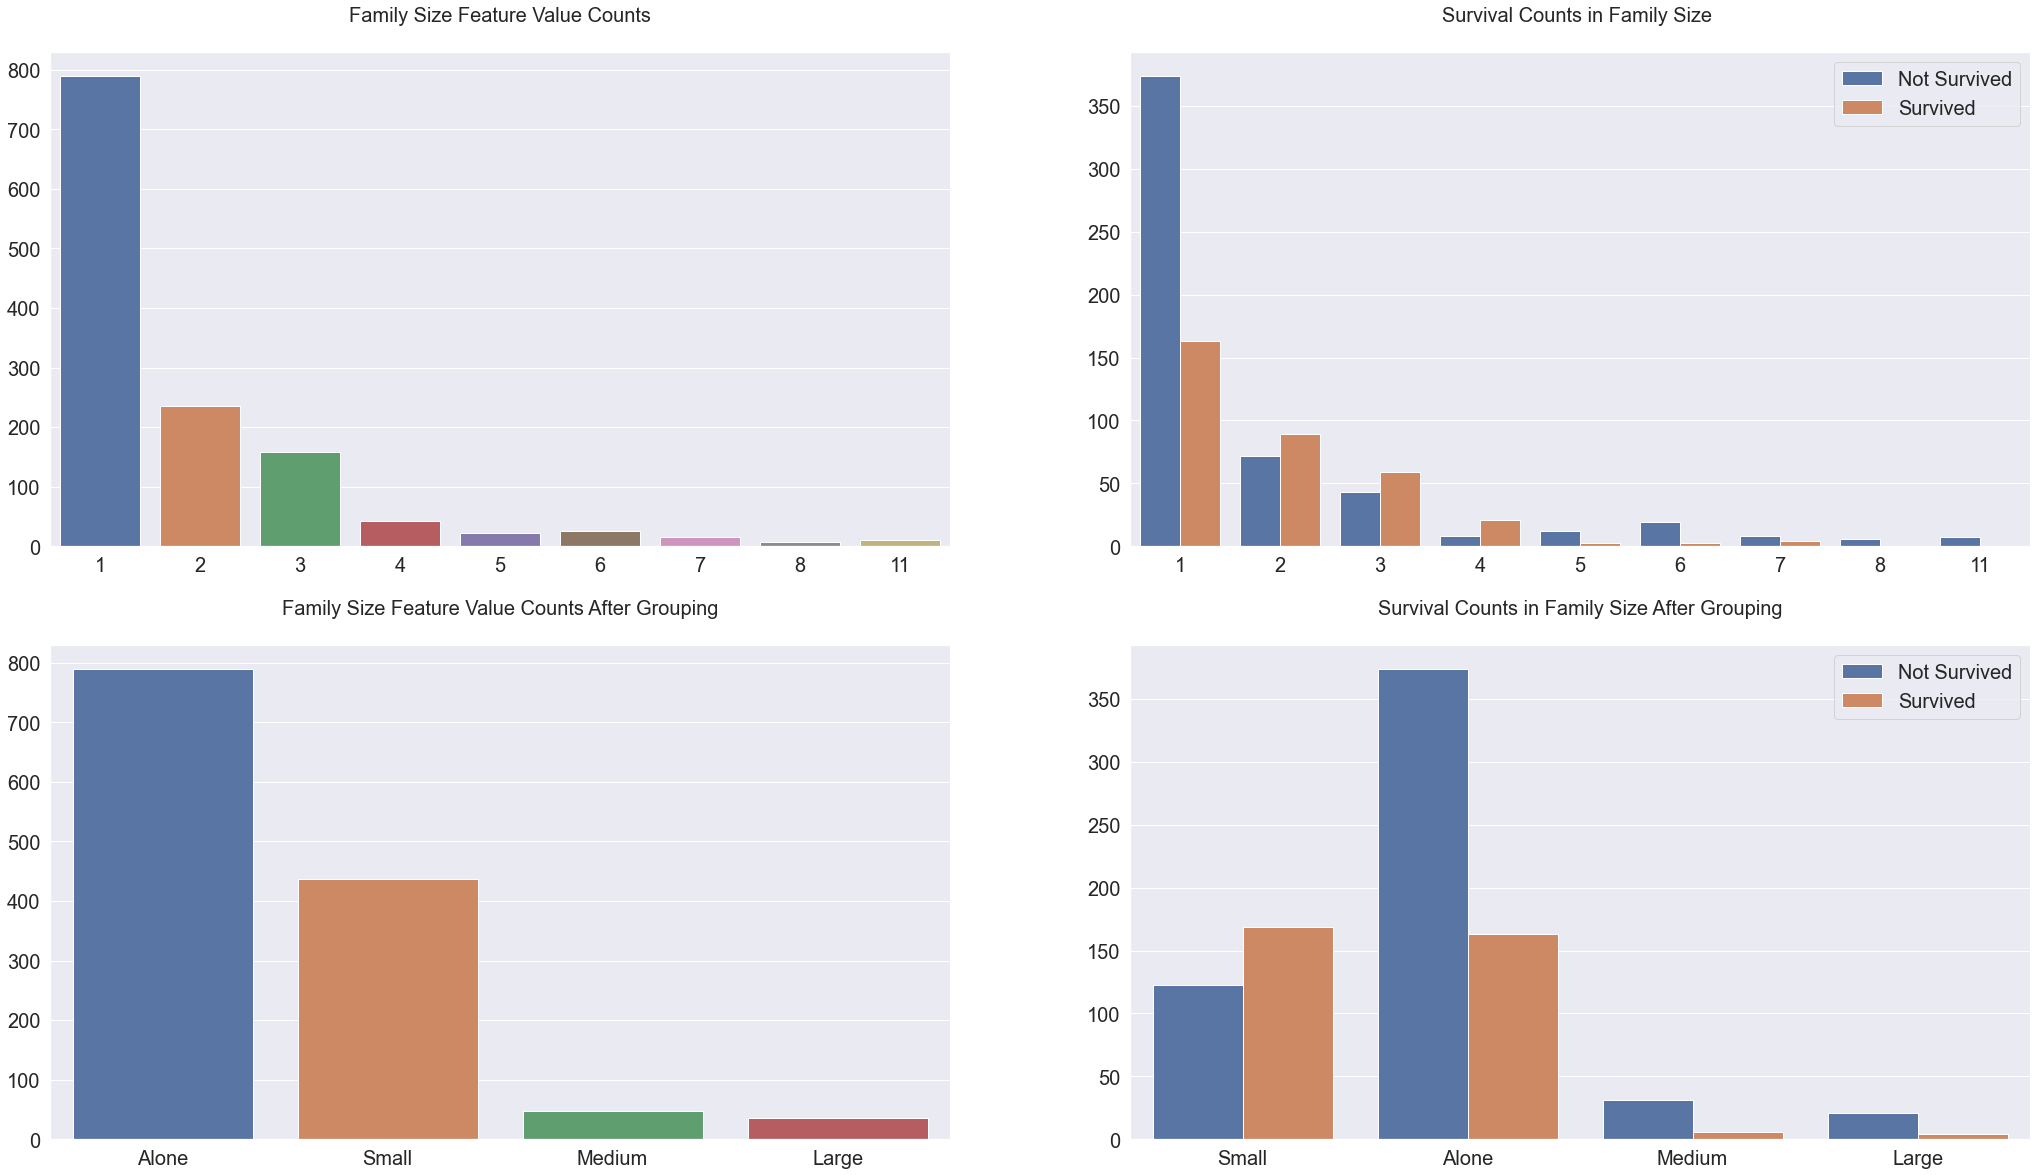

In [28]:
#cara singkat 
import matplotlib.pyplot as plt
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

## Feature Engineering - Part 2

Kita buat feature baru bernama Ticket_Frequency dengan nilai gabungan dari Ticket yang sama. Contoh sebelumnya akan bernilai 6, karena ada 6 ticket yang sama dalam data kita.

Anda diminta untuk melengkapi bagian [...1...] dengan menghitung hasil dari grouping pada kolom Ticket dan pada bagian [...2...] untuk mengeluarkan plot tersebut.

Pada hasil plot penjelasannya feature Family_Size_Grouped, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat.

Kenapa feature ini berbeda dari Family_Size_Grouped? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga.

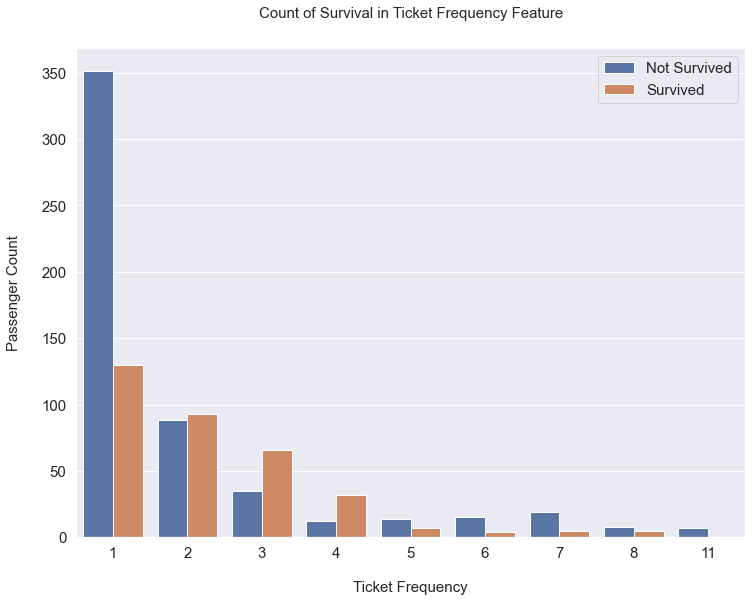

In [29]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

## Feature Engineering - Part 3


Jika anda lihat pada contoh di atas, dari nama orang yang ada di dataset ini, semuanya mempunyai pola yang sama, yaitu:

[Nama_belakang], [Jabatan]. [Nama_depan]
sehingga kita bisa mengambil jabatannya saja dengan mengambil kata setelah "," (koma) dan sebelum "." (titik). Fungsi .split() akan membagi kalimat menjadi beberapa kata dengan keyword tertentu, dan dapat diambil dengan index [ ]

Gantilah bagian [...1...] untuk menghasilkan seperti di bawah ini:

[Braund, Mr. , Owen Harris]
Lalu fungsi lakukan split untuk bagian kedua yang akan menghasilkan:

[Mr, Owen Harris]
Lalu kita ambil index 0 alias yang pertama sehingga akan mendapatkan Mr

Dari sini kita bisa membuat fitur baru dengan nama ‘Title’ yang berisi jabatan seseorang.

Jabatan yang paling umum di sini adalah Mr, Mrs. , dan Miss.

Sehingga kita bisa mengetahui status menikah seseorang dari Mrs.

Kita bisa membuat fitur baru lagi yaitu ‘Is_Married’

Fitur ini adalah jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah.

Lalu kita buat grafik plot nya

Setelah melakukan df_all[‘Title’].unique()

Ternyata ada banyak sekali jabatan lain, dan kita mengelompokkannya menjadi satu pada konten berikutnya

['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] akan kita ubah menjadi 'Miss/Mrs/Ms'

['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] menjadi 'Dr/Military/Noble/Clergy'

In [30]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

print(df_all['Title'].unique())

df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1

print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


C:\Users\adhi_\miniconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Feature Engineering - Part 4

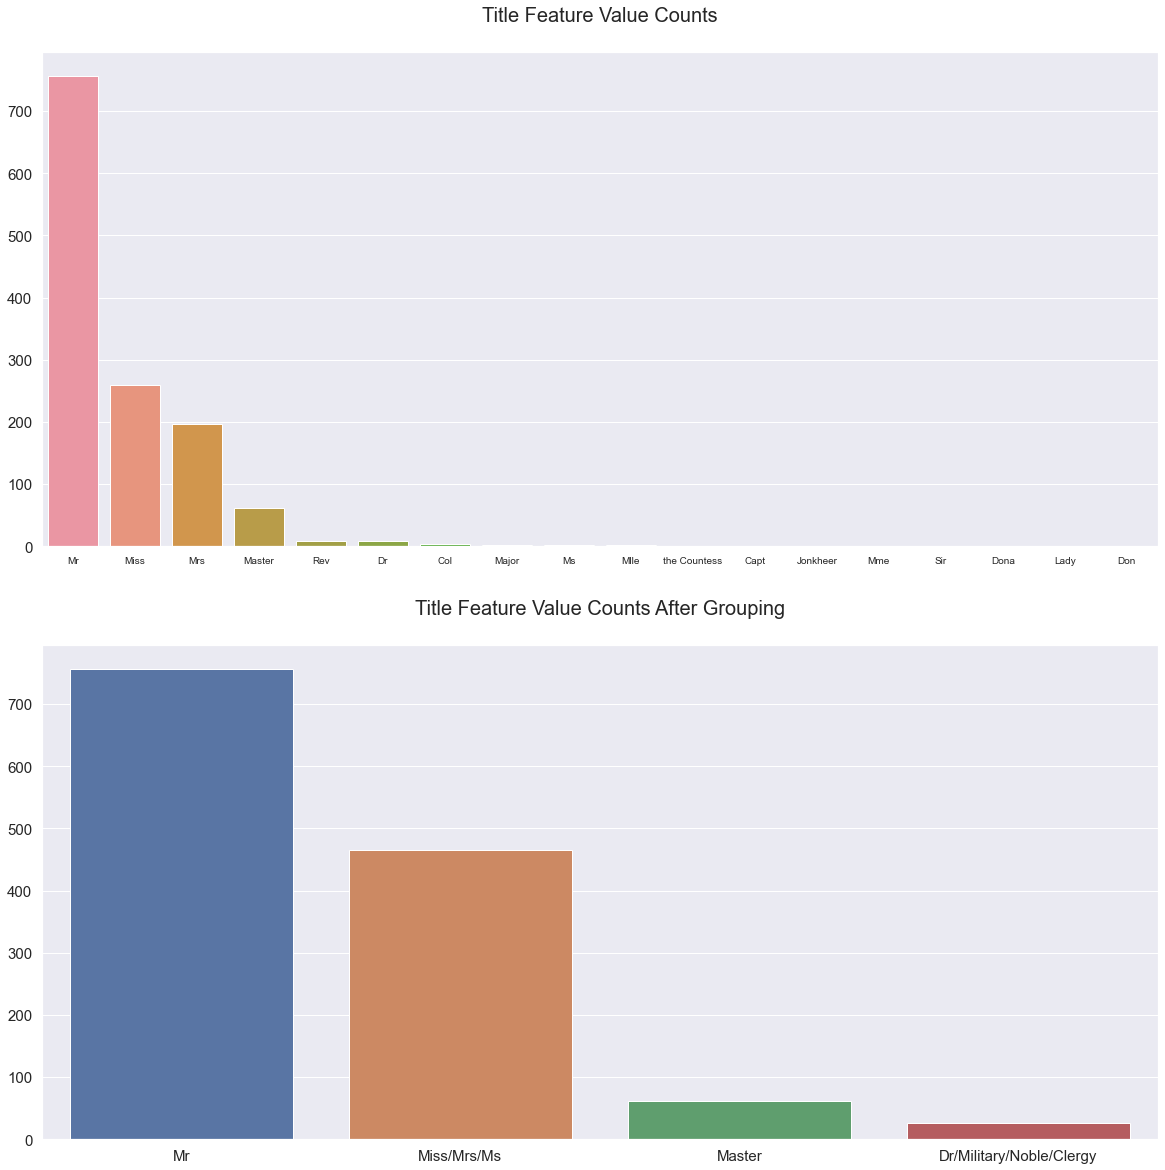

In [31]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [32]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


In [33]:
df_all.to_csv('TrainTest_Titanic.csv', index = False)


In [34]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


## Modelling dengan hasil Feature Engineering - Part 1

1. Menaikkan akurasi dari model dengan Feature Engineering.
2. Perintah pertama bertujuan untuk membagi kembali dataset kita menjadi train dan test
3. Perintah kedua adalah LabelEncoder untuk data” yang bersifat non-numeric, tujuannya adalah melakukan encoding [0-n] untuk data kategorikal. Contohnya Sex, akan dirubah menjadi 0 dan 1, laki-laki dan perempuan.
4. Perintah ketiga bertujuan untuk mengubah feature kategori menjadi one hot, dengan OneHotEncoder. Akan menghasilkan beberapa kolom tergantung banyaknya kategori.

Contohnya Pclass akan menjadi 3 kolom Pclass_1, Pclass_2, dan Pclass_3. Isinya adalah 0 dan 1 tergantung kategori orang tersebut

In [35]:
df_all=pd.read_csv('TrainTest_Titanic.csv')
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


In [36]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]
df_train.shape, df_test.shape

((891, 17), (418, 17))

In [37]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

C:\Users\adhi_\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [38]:
LabelEncoder?

In [39]:
df_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,28,NaN,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,52,C85,0,7,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,34,NaN,2,10,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,48,C123,2,6,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,48,NaN,2,10,"Allen, Mr. William Henry",0,5,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


## Modelling dengan hasil Feature Engineering - Part 2

Kita akan melakukan drop terhadap kolom-kolom yang tidak kita perlukan, atau yang sudah kita encode sebelumnya

In [40]:
df_all = concat_df(df_train,df_test)
drop_cols=['Cabin', 'Embarked', 'Survived', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']
df_all.drop(columns=drop_cols, inplace=True)

print(df_all.head())

   Age  Embarked_1  Embarked_2  Embarked_3  Family_Size  Family_Size_Grouped  \
0   28         0.0         0.0         1.0            2                    3   
1   52         1.0         0.0         0.0            2                    3   
2   34         0.0         0.0         1.0            1                    0   
3   48         0.0         0.0         1.0            2                    3   
4   48         0.0         0.0         1.0            1                    0   

   Family_Size_Grouped_1  Family_Size_Grouped_2  Family_Size_Grouped_3  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    1.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    1.0                    0.0                    0.0   

   Family_Size_Grouped_4  ...  Pclass_2  Pclass_3  Sex_1  Sex_2  SibSp  \


## Modelling dengan hasil Feature Engineering - Part 3
Setelah kita membagi train dan test untuk modelling seperti ini, kita akan melakukan modelling

In [41]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 24)
y_train shape: (891,)
X_test shape: (418, 24)


## Modelling dengan hasil Feature Engineering - Part 4
Kita akan menggunakan RandomForestClassifier dari SkLearn dan menghitung akurasi menggunakan cross_val_score

In [42]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.86516854 0.85393258]
Mean: 0.8327715355805243
Standard Deviation: 0.03604127069930158


# Modelling tanpa hasil Feature Engineering - Part 1


Sekarang kita akan modelling lagi tanpa menyertakan fitur yang sudah kita buat.

Ketikkan semua kode yang ada di bawah ini:

In [44]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()


,Age,Embarked_1,Embarked_2,Embarked_3,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp
0,28,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,1.0,1
1,52,1.0,0.0,0.0,7,0,1.0,0.0,0.0,1.0,0.0,1
2,34,0.0,0.0,1.0,10,0,0.0,0.0,1.0,1.0,0.0,0
3,48,0.0,0.0,1.0,6,0,1.0,0.0,0.0,1.0,0.0,1
4,48,0.0,0.0,1.0,10,0,0.0,0.0,1.0,0.0,1.0,0


In [45]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))


print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 12)
y_train shape: (891,)
X_test shape: (418, 12)


## Modelling tanpa hasil Feature Engineering - Part 2

In [46]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [50]:
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

83.95

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.83146067 0.75280899 0.87640449 0.86516854 0.80898876
 0.80898876 0.76404494 0.85393258 0.83146067]
Mean: 0.818214731585518
Standard Deviation: 0.0393190827077358


In [51]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

## Konklusi:

Feature Engineering mengharuskan kita membuat banyak ide fitur dari data yang sudah ada.

Biasanya yang dapat kita lakukan adalah, penggabungan (grouping), ekstraksi fitur (seperti Title yang didapat dari nama orang), dan masih banyak lagi.

Jangan malas untuk melakukan feature engineering dan mencoba segala sesuatu yang ada di pikiran kita. Barangkali ini dapat meningkatkan akurasi model kita.

Sumber lain : https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial